In [ ]:
import tarfile
import os

# 指定 TAR 文件的路径
tar_file_path = '/content/CNN.tar'
# 指定解压后的文件夹路径
extract_folder_path = '/content/cnn'

# 创建解压文件夹（如果不存在）
if not os.path.exists(extract_folder_path):
    os.makedirs(extract_folder_path)

# 解压 TAR 文件
with tarfile.open(tar_file_path, 'r') as tar_ref:
    tar_ref.extractall(extract_folder_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm

In [ ]:
# 设置参数
img_height, img_width = 64, 64
batch_size = 32
num_classes = 10  # 根据数据集实际类别数设置

In [ ]:
# 数据路径
train_dir = '/content/cnn/HWDB1.0trn'  # 替换为本地训练集路径
test_dir = '/content/cnn/HWDB1.0tst'    # 替换为本地测试集路径

In [ ]:
# 数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 2392 images belonging to 10 classes.
Found 595 images belonging to 10 classes.


In [ ]:
# 创建类别索引到类别名称的映射
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # 将类别索引映射到汉字名称

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31077 (\N{CJK UNIFIED IDEOGRAPH-7965}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20196 (\N{CJK UNIFIED IDEOGRAPH-4EE4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20065 (\N{CJK UNIFIED IDEOGRAPH-4E61}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

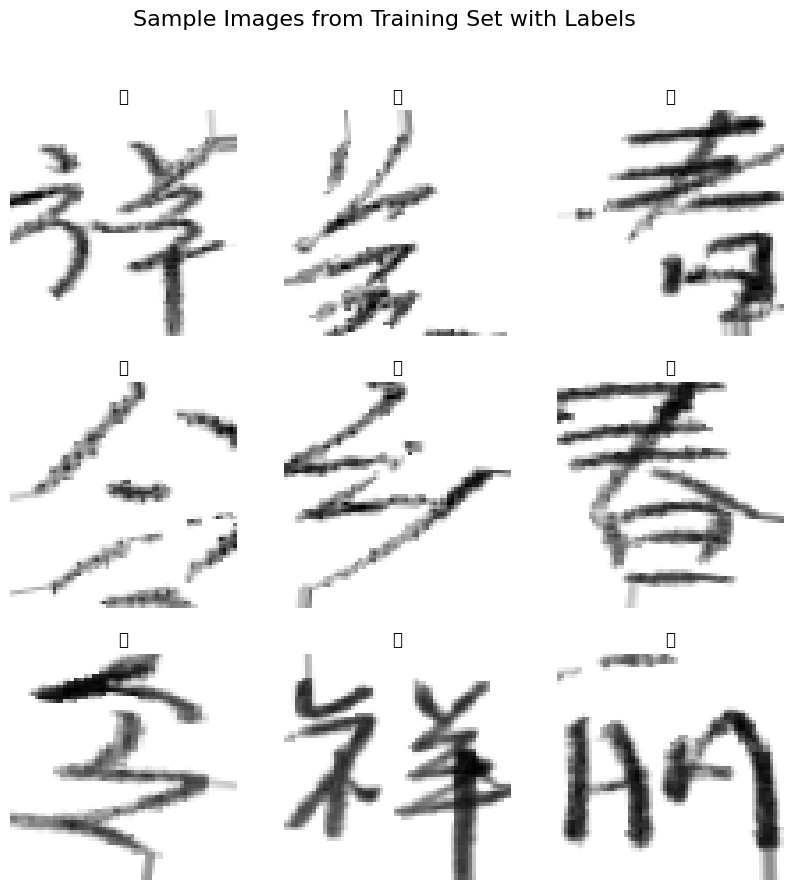

In [ ]:
# 展示训练集中的几张图片，并显示其对应的汉字名称

sample_images, sample_labels = next(train_generator)  # 获取一个批次的图像和标签
plt.figure(figsize=(10, 10))
for i in range(9):  # 展示前9张图片
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')  # squeeze 去掉多余的维度，cmap 设置为灰度
    label_index = sample_labels[i].argmax()  # 获取标签的索引
    label_name = index_to_class[label_index]  # 查找汉字名称
    plt.title(label_name)  # 设置标题为汉字名称
    plt.axis('off')
plt.suptitle("Sample Images from Training Set with Labels", fontsize=16)
plt.show()

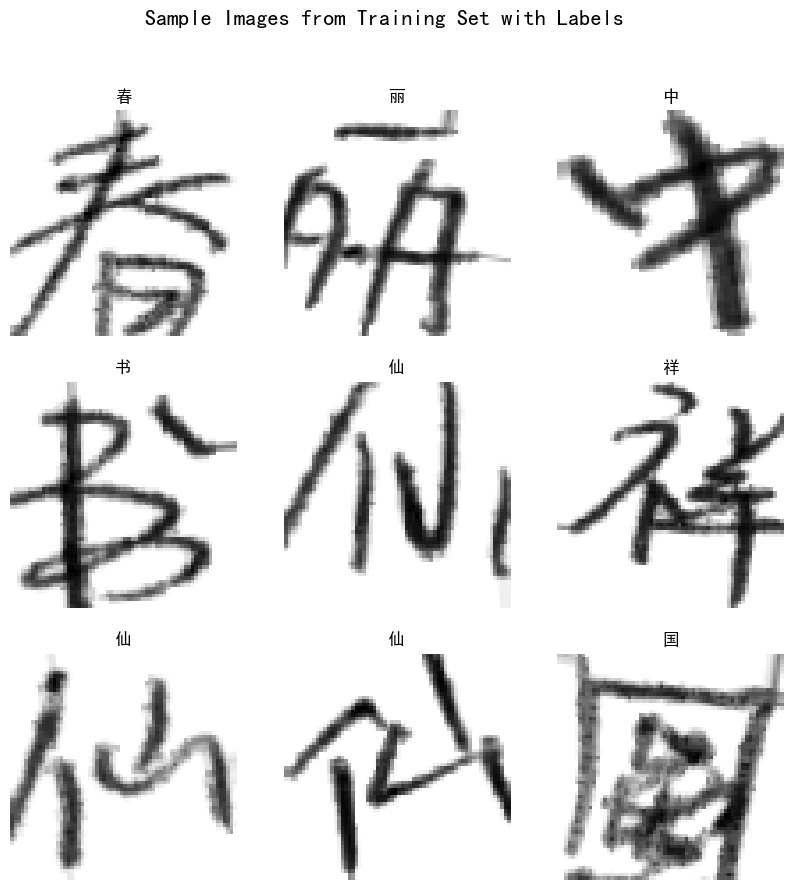

In [ ]:
# 展示训练集中的几张图片，并显示其对应的汉字名称
# 确认字体文件路径，并将字体添加到 matplotlib 字体管理器
font_path = '/content/cnn/simhei.ttf'
fm.fontManager.addfont(font_path)
my_font = fm.FontProperties(fname=font_path)  # 创建字体对象

# 设置 matplotlib 默认字体为 SimHei，避免警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

sample_images, sample_labels = next(train_generator)  # 获取一个批次的图像和标签
plt.figure(figsize=(10, 10))
for i in range(9):  # 展示前9张图片
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')  # squeeze 去掉多余的维度，cmap 设置为灰度
    label_index = sample_labels[i].argmax()  # 获取标签的索引
    label_name = index_to_class[label_index]  # 查找汉字名称
    plt.title(label_name)  # 设置标题为汉字名称
    plt.axis('off')
plt.suptitle("Sample Images from Training Set with Labels", fontsize=16)
plt.show()

In [ ]:
# 创建CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 查看模型架构
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,146 (4.86 MB)

 Trainable params: 1,275,146 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 训练模型
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 327ms/step - accuracy: 0.1116 - loss: 2.2991 - val_accuracy: 0.5295 - val_loss: 1.5378
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 1.7524 - val_accuracy: 0.6316 - val_loss: 1.4448
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - accuracy: 0.5445 - loss: 1.3987 - val_accuracy: 0.8750 - val_loss: 0.4970
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5938 - loss: 1.1018 - val_accuracy: 0.7895 - val_loss: 0.6308
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.7745 - loss: 0.7278 - val_accuracy: 0.9427 - val_loss: 0.2027
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8438 - loss: 0.5652 - val_accuracy: 0.9474 - val_loss: 0.1079
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - accuracy: 0.8534 - loss: 0.4751 - val_accuracy: 0.9566 - val_loss: 0.1704
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9062 - loss: 0.3988 - val_accuracy: 0.8421 - val_loss: 0.6551
Epoch 9/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - accuracy: 0.8885 - loss: 0.3539 - val_accuracy: 0.9601 - val_loss: 0.1484
Epoch 10/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 0.5435 - val_accuracy: 0.9474 - v

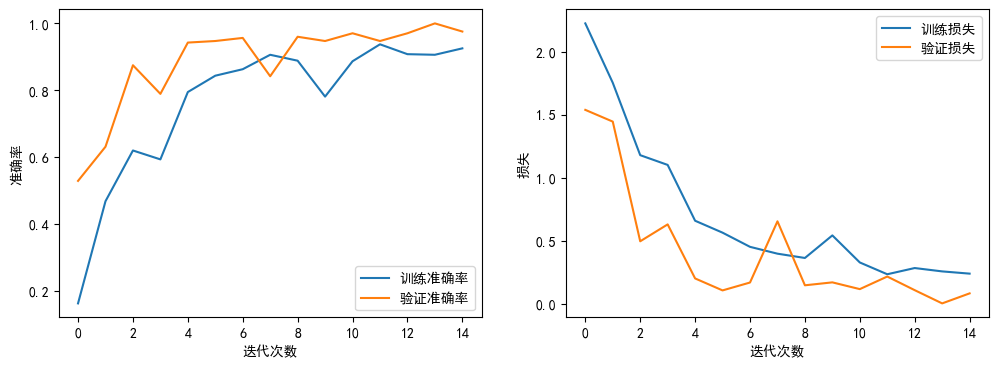

In [ ]:
# 可视化训练过程
plt.rcParams['font.sans-serif'] = ['simhei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号显示正常
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('迭代次数')
plt.ylabel('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.legend()

plt.show()

In [ ]:
# 测试模型
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"测试集上的准确率: {test_accuracy:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9748 - loss: 0.0967
测试集上的准确率: 0.98


In [ ]:
#加入图片预测汉字
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 预测和显示图片的汉字名称
def predict_and_display_images(model, image_paths, class_indices):
    # 创建从类别索引到汉字名称的映射
    index_to_class = {v: k for k, v in class_indices.items()}  # 将类别索引映射到汉字名称

    plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(image_paths):
        try:
            # 加载图片并调整为模型输入大小
            img = load_img(img_path, target_size=(img_height, img_width), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # 归一化像素值到 [0, 1]
            img_array = np.expand_dims(img_array, axis=0)  # 添加批次维度

            # 使用模型进行预测
            predictions = model.predict(img_array)
            predicted_index = np.argmax(predictions, axis=1)[0]  # 获取预测的类别索引
            predicted_class = index_to_class[predicted_index]     # 查找对应的汉字名称

            # 显示图片和预测结果
            plt.subplot(3, 4, i + 1)
            plt.imshow(img_array[0].squeeze(), cmap='gray')  # 使用 img_array 进行显示并 squeeze
            plt.title(f"预测: {predicted_class}")  # 设置标题为预测的汉字名称
            plt.axis('off')

        except Exception as e:
            # 输出错误信息并跳过当前图片
            print(f"无法识别图片 {img_path}，错误信息: {e}")
            continue

    plt.suptitle("Prediction Results", fontsize=20)
    plt.show()

In [ ]:
# 示例图片路径列表
image_paths = [
    '/content/cnn/predict_and_display_images/1.png',
    '/content/cnn/predict_and_display_images/2.png',
    '/content/cnn/predict_and_display_images/3.png',
    '/content/cnn/predict_and_display_images/4.png'
    # 添加其他图片路径
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


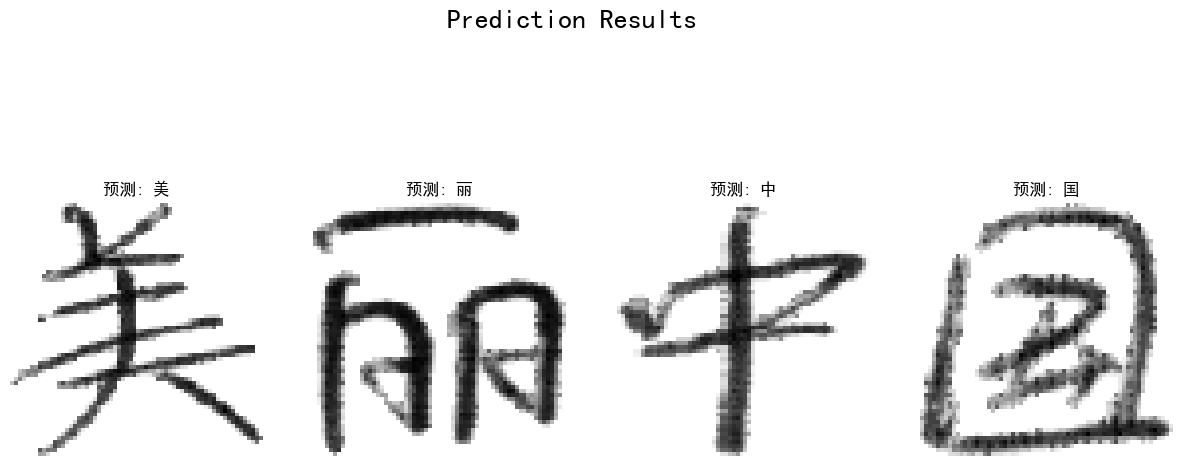

In [ ]:
# 调用函数进行预测和显示
predict_and_display_images(model, image_paths, train_generator.class_indices)